# 3D Visualisations of AStrings and Atomic Functions

Atomic String function AString(x) was introduced in 2017-2018 by Prof. Sergei Eremenko https://www.researchgate.net/profile/Sergei_Eremenko in papers https://www.researchgate.net/publication/326530883_Atomic_Strings_and_Fabric_of_Spacetime_English_with_Russian_Abstract, https://www.researchgate.net/publication/329465767_Atomic_solitons_as_a_new_class_of_solitons_English_with_Russian_Abstract.

AString(x) is an integral of Atomic Function up(x) introduced in 1970th by V.L. Rvachev and V.A. Rvachev. This Notebook depicts important properties of AStrings and AFs.

In [3]:
# %load CommonFunctions.py
# # COMMON ATOMIC AND ASTRING FUNCTIONS

############### One String Pulse with width, shift and scale #############
def StringPulse(String1, t: float, a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    if (x < -1):
        res = -0.5
    elif (x > 1):
        res = 0.5
    else:
        res = String1(x)
    res = d + res * c
    return res


###### Atomic String Applied to list with width, shift and scale #############
def String(String1, x: list, a = 1., b = 0., c = 1., d = 0.) -> list:
    res = []
    for i in range(len(x)):
        res.append(StringPulse(String1, x[i], a, b, c, d))
    return res


###### Summation of two lists #############
def Sum(x1: list, x2: list) -> list:
    res = []
    for i in range(len(x1)):
        res.append(x1[i] + x2[i])
    return res



##########################################################
##This script introduces Atomic Function 
################### One Pulse of atomic function
def up1(x: float) -> float:
    #Atomic function table
    up_y = [0.5, 0.48, 0.460000017,0.440000421,0.420003478,0.400016184, 0.380053256, 0.360139056, 0.340308139, 0.320605107,
           0.301083436, 0.281802850, 0.262826445, 0.244218000, 0.226041554, 0.208361009, 0.191239338, 0.174736305, 
           0.158905389, 0.143991189, 0.129427260, 0.115840866, 0.103044024, 0.9110444278e-01, 0.798444445e-01, 0.694444445e-01, 
           0.598444445e-01, 0.510444877e-01, 0.430440239e-01, 0.358409663e-01, 0.294282603e-01, 0.237911889e-01, 0.189053889e-01, 
           0.147363055e-01, 0.112393379e-01, 0.836100883e-02, 0.604155412e-02, 0.421800000e-02, 0.282644445e-02, 0.180999032e-02, 
           0.108343562e-02, 0.605106267e-03, 0.308138660e-03, 0.139055523e-03, 0.532555251e-04, 0.161841328e-04, 0.347816874e-05, 
           0.420576116e-05, 0.167693347e-07, 0.354008603e-10, 0]
    up_x = np.arange(0.5, 1.01, 0.01)

    res = 0.
    if ((x >= 0.5) and (x <= 1)):
        for i in range(len(up_x) - 1):
            if (up_x[i] >= x) and (x < up_x[i+1]):
                N1 = 1 - (x - up_x[i])/0.01
                res = N1 * up_y[i] + (1 - N1) * up_y[i+1]
                return res
    return res


# In[19]:
############### Atomic Function Pulse with width, shift and scale #############
def pulse(up1, t = 0., a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    res = 0.
    if (x >= 0.5) and (x <= 1):
        res = up1(x)
    elif (x >= 0.0) and (x < 0.5):
        res = 1 - up1(1 - x)
    elif (x >= -1 and x <= -0.5):
        res = up1(-x)
    elif (x > -0.5) and (x < 0):
        res = 1 - up1(1 + x)
    res = d + res * c
    return res

############### Atomic Function Applied to list with width, shift and scale #############
def up(up1, x: list, a = 1., b = 0., c = 1., d = 0.) -> list:
    res = []
    for i in range(len(x)):
        res.append(pulse(up1, x[i], a, b, c, d))
    return res

############### Atomic String #############
def AString1(x: float) -> float:
    res = 1 * (pulse(up1, x/2.0 - 0.5) - 0.5)
    return res

############### Atomic String Pulse with width, shift and scale #############
def AStringPulse(t: float, a = 1., b = 0., c = 1., d = 0.) -> float:
    x = (t - b)/a
    if (x < -1):
        res = -0.5
    elif (x > 1):
        res = 0.5
    else:
        res = AString1(x)
    res = d + res * c
    return res

###### Atomic String Applied to list with width, shift and scale #############
def AString(x: list, a = 1., b = 0., c = 1., d = 0.) -> list:
    res = []
    for i in range(len(x)):
        res.append(AStringPulse(x[i], a, b, c, d))
    return res



In [4]:
import numpy as np
import pylab as pl

In [5]:
x = np.arange(-2.0, 2.0, 0.01)

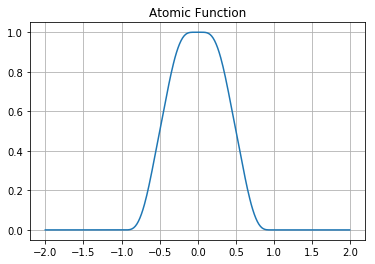

In [6]:
pl.title('Atomic Function')
pl.plot(x, up(up1, x), label='Atomic Function')
pl.grid(True)
pl.show()

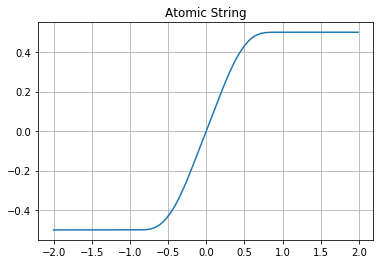

In [7]:
pl.title('Atomic String')
pl.plot(x, String(AString1, x, 1.0, 0, 1, 0), label='Atomic String')
pl.grid(True)
pl.show()

# Atomics 3D

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [9]:
def plot3d(func, title = 'Atomic Function pulse', xmin = -2., xmax = 2., ymin = -2., ymax = 2., 
           N = 200, showColorbar = True, Zlim = [0, 1.5], showContour = True, ContourOffsets = [-2., 2.]):
    # Create 3D figure
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.arange(xmin,  xmax, (xmax - xmin)/N)
    Y = np.arange(ymin,  ymax, (ymax - ymin)/N)
    X, Y = np.meshgrid(X, Y)

    Z = X.copy() # Allocate memory

    for i in range(len(X)):
        for j in range(len(X)):
            x = X[i][j]
            y = Y[i][j]
            # r = np.sqrt(x**2 + y**2) # Radial Coordinate
            Z[i][j] = func(x, y)
            # print(i, j, x, y, Z[i][j])

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, rstride=1, cstride=1)

    # Customize the z axis.
    ax.set_zlim(Zlim[0], Zlim[1])
    
    # Countours
    if (showContour):
        #cset = ax.contour(X, Y, Z, zdir='z', cmap=cm.coolwarm, offset=0)
        if (ContourOffsets[0] != float("inf")):
            cset = ax.contour(X, Y, Z, zdir='x', cmap=cm.coolwarm, offset = ContourOffsets[0])
        if (ContourOffsets[1] != float("inf")):
            cset = ax.contour(X, Y, Z, zdir='y', cmap=cm.coolwarm, offset = ContourOffsets[1])
   
    # Add a color bar which maps values to colors.
    if (showColorbar):
        fig.colorbar(surf, shrink=0.5, aspect=5)

    #Show
    plt.title(title)
    plt.show()

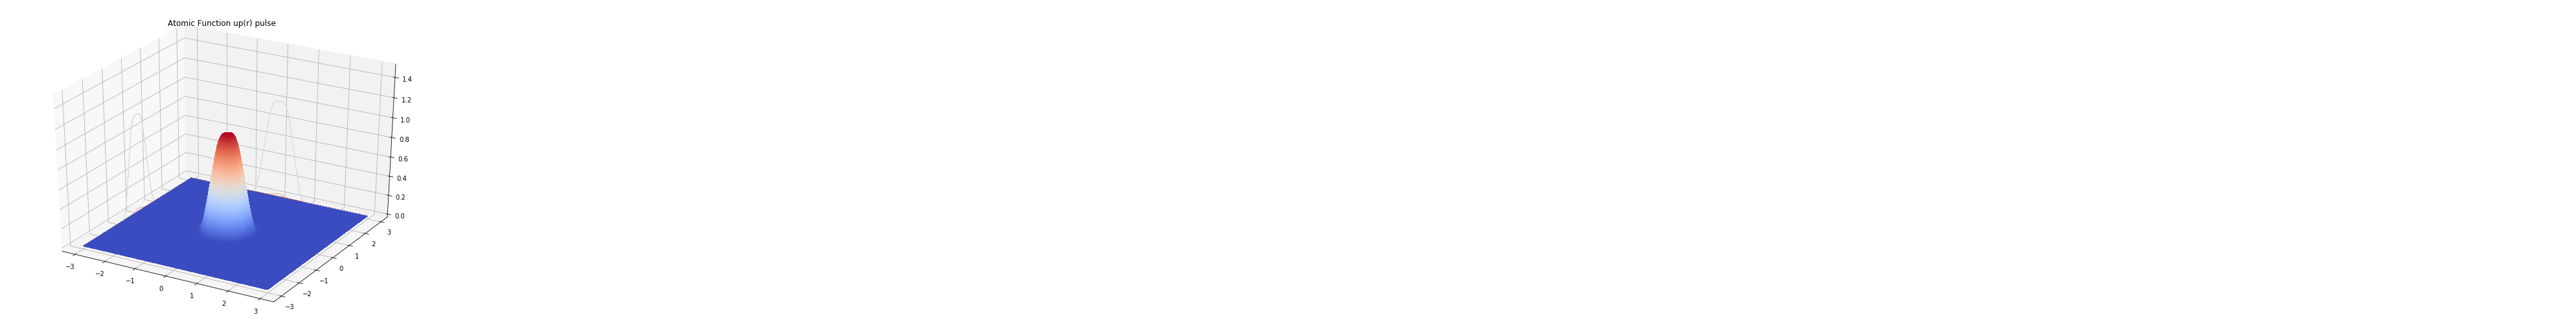

In [10]:
def oneup(x: float, y: float) -> float:
    r = np.sqrt(x**2 + y**2) # Radial Coordinate
    return pulse(up1, r)
plot3d(oneup, title = 'Atomic Function up(r) pulse', xmin = -3, xmax = 3, ymin = -3, ymax = 3, 
       N = 400, Zlim = [0, 1.5], showColorbar = False, ContourOffsets = [-3,3])

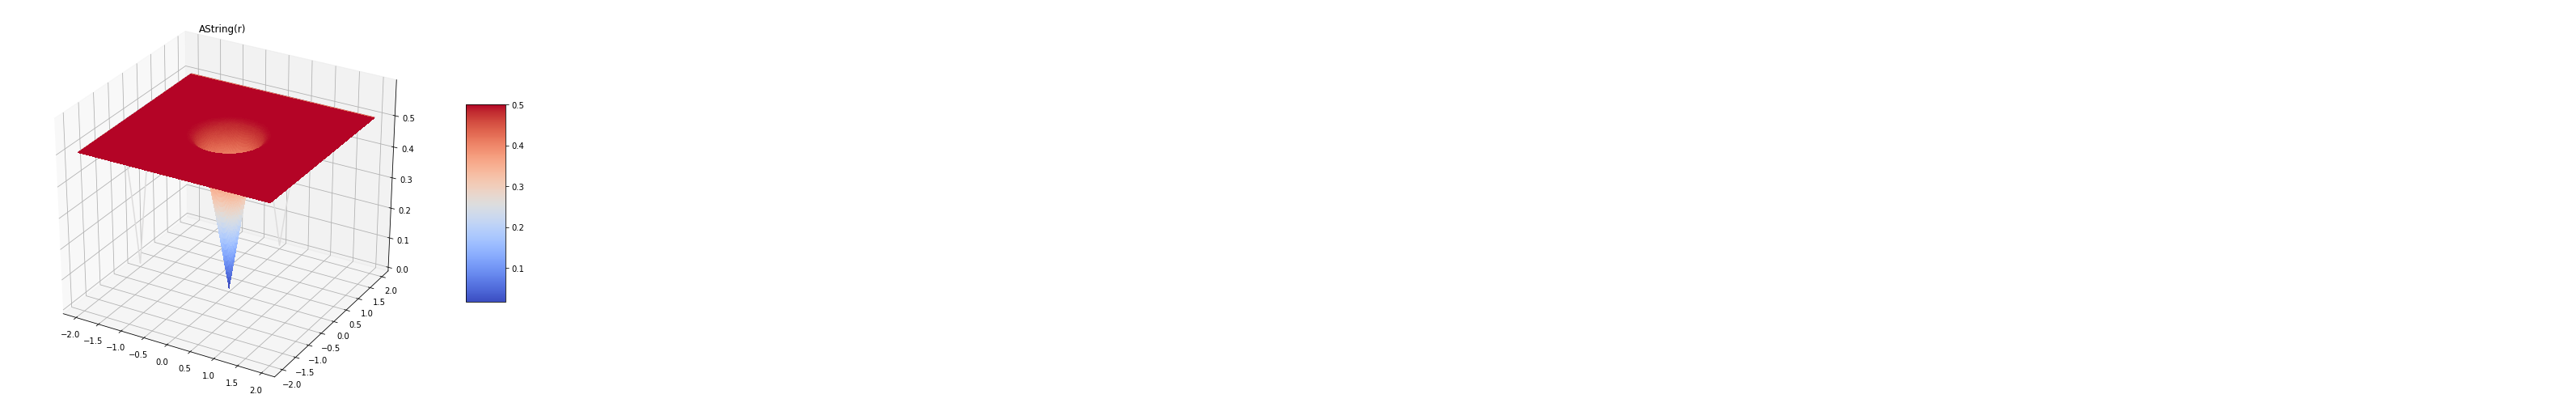

In [11]:
def Ast1(x: float, y: float) -> float:
    r = np.sqrt(x**2 + y**2) # Radial Coordinate
    return AStringPulse(r)
plot3d(Ast1, title = 'AString(r)', Zlim = [0, 0.6])

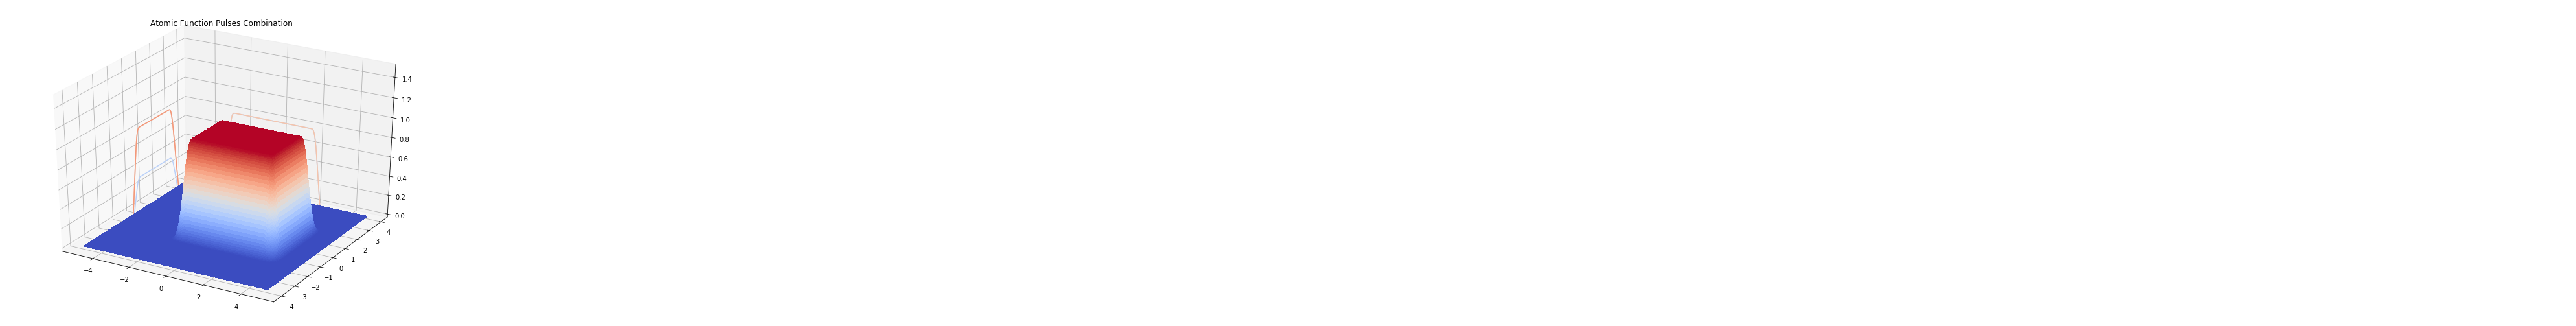

In [12]:
def ManyPulses(x: float, y: float) -> float:
    r = np.sqrt(x**2 + y**2) # Radial Coordinate
    rx = pulse(up1, x, a = 1., b = 0., c = 1.) + pulse(up1, x, a = 1., b = 1., c = 1.) \
        + pulse(up1, x, a = 1., b = 2.00, c = 1.) + pulse(up1, x, a = 1., b = 3.00, c = 1.) \
        + pulse(up1, x, a = 1., b = -1.0, c = 1.)
    ry = pulse(up1, y, a = 1., b = -1., c = 1.) + pulse(up1, y, a = 1., b = 0., c = 1.) + pulse(up1, y, a = 1., b = 1.00, c = 1.)    
    return (rx * ry)
plot3d(ManyPulses, title = 'Atomic Function Pulses Combination', xmin = -5, xmax = 5, ymin = -4, ymax = 4, 
       N = 400, showColorbar = False, ContourOffsets = [-4,2])

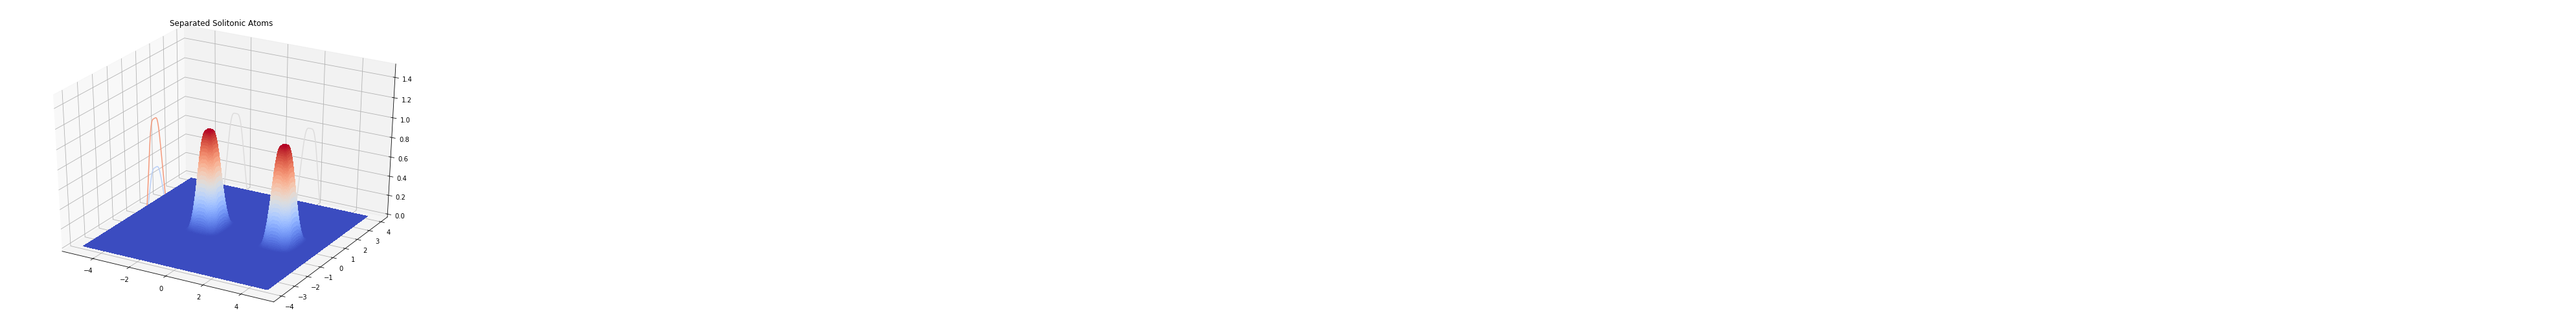

In [13]:
def ManyPulses(x: float, y: float) -> float:
    rx = pulse(up1, x, a = 1., b = -1., c = 1.) + pulse(up1, x, a = 1., b = 3., c = 1.)
    ry = pulse(up1, y, a = 1., b = 0., c = 1.)  
    return (rx * ry)
plot3d(ManyPulses, title = 'Separated Solitonic Atoms', xmin = -5, xmax = 5, ymin = -4, ymax = 4, 
       N = 400, showColorbar = False, ContourOffsets = [-4,2])

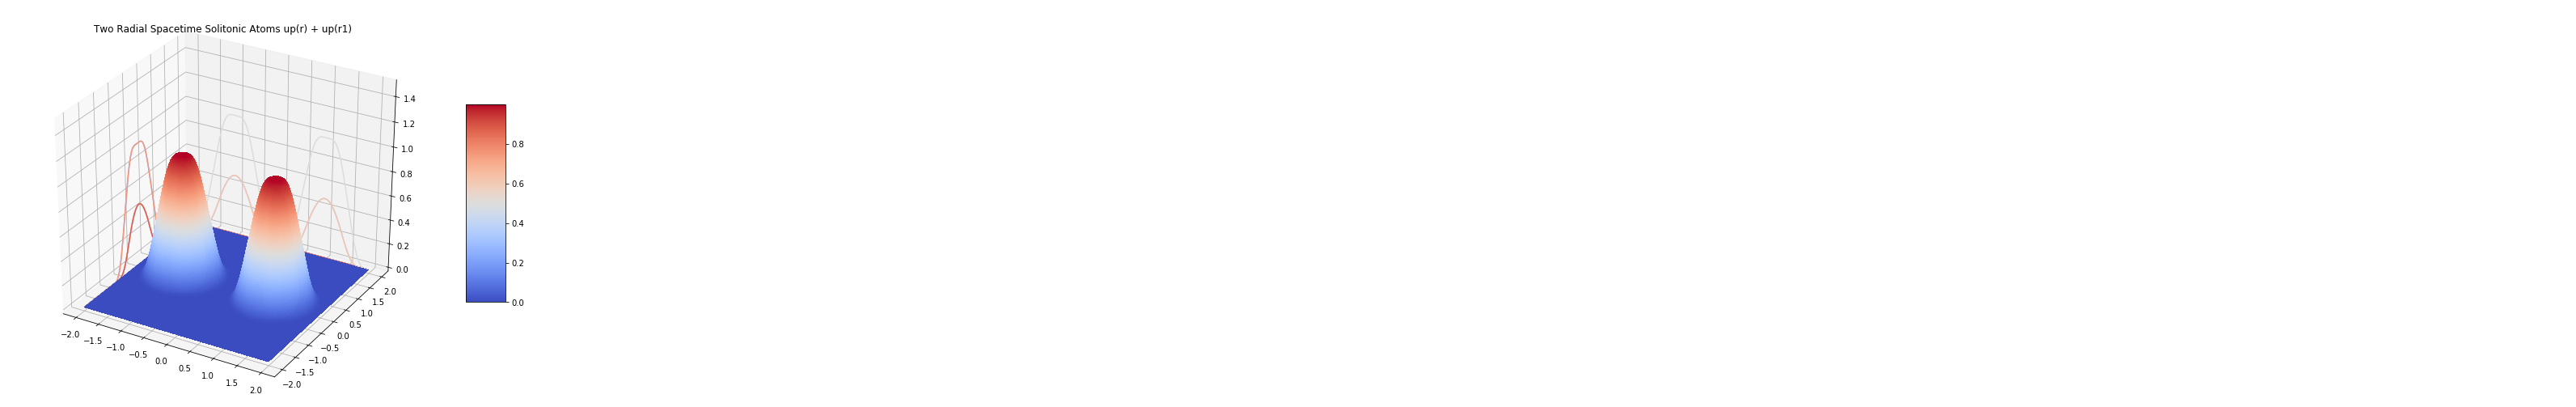

In [14]:
def TwoPulses(x: float, y: float) -> float:
    r = np.sqrt((x-1)**2 + (y-0)**2) # Radial Coordinate
    r1 = np.sqrt((x+1)**2 + (y+0)**2) # Shifted coordinate
    return pulse(up1, r, a = 1., b = 0., c = 1.) + pulse(up1, r1, a = 1., b = 0, c = 1.)
plot3d(TwoPulses, title = 'Two Radial Spacetime Solitonic Atoms up(r) + up(r1)', xmin = -2, xmax = 2, ymin = -2, ymax = 2, 
       N = 400, showColorbar = True, ContourOffsets = [-2,2])

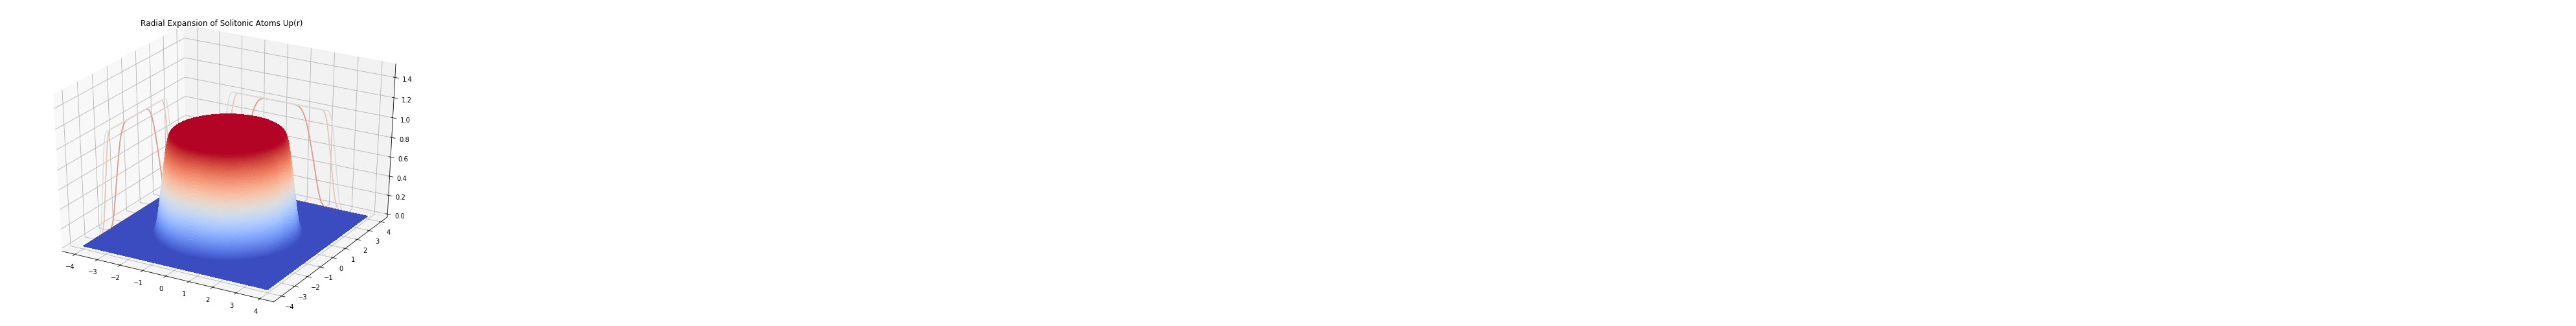

In [15]:
def RadialPulses(x: float, y: float) -> float:
    r = np.sqrt(x**2 + y**2) # Radial Coordinate
    return pulse(up1, r, a = 1., b = 0., c = 1.) + pulse(up1, r, a = -1., b = 1., c = 1.) + \
           pulse(up1, r, a =-1., b = 2., c = 1.)

plot3d(RadialPulses, title = 'Radial Expansion of Solitonic Atoms Up(r)', xmin = -4, xmax = 4, ymin = -4, ymax = 4, 
       N = 400, showColorbar = False, ContourOffsets = [-4,4])

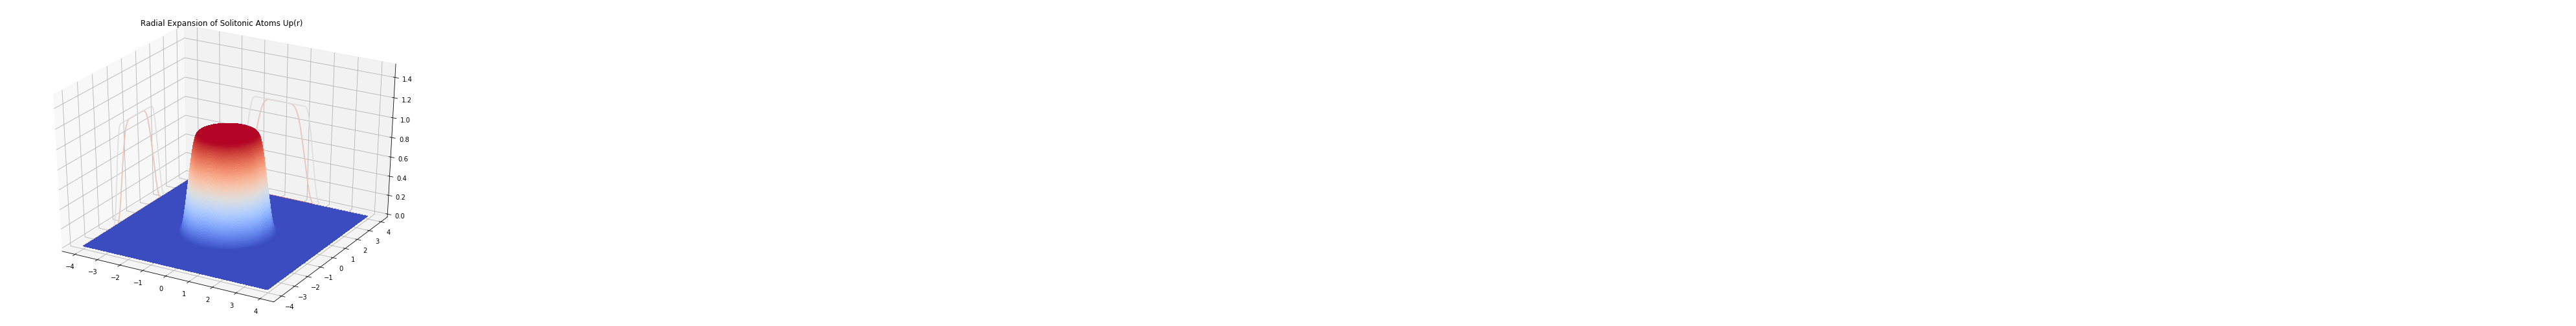

In [16]:
def RadialPulses(x: float, y: float) -> float:
    r = np.sqrt(x**2 + y**2) # Radial Coordinate
    return pulse(up1, r, a = 1., b = 0., c = 1.) + pulse(up1, r, a = -1., b = 1., c = 1.)

plot3d(RadialPulses, title = 'Radial Expansion of Solitonic Atoms Up(r)', xmin = -4, xmax = 4, ymin = -4, ymax = 4, 
       N = 400, showColorbar = False, ContourOffsets = [-4,4])

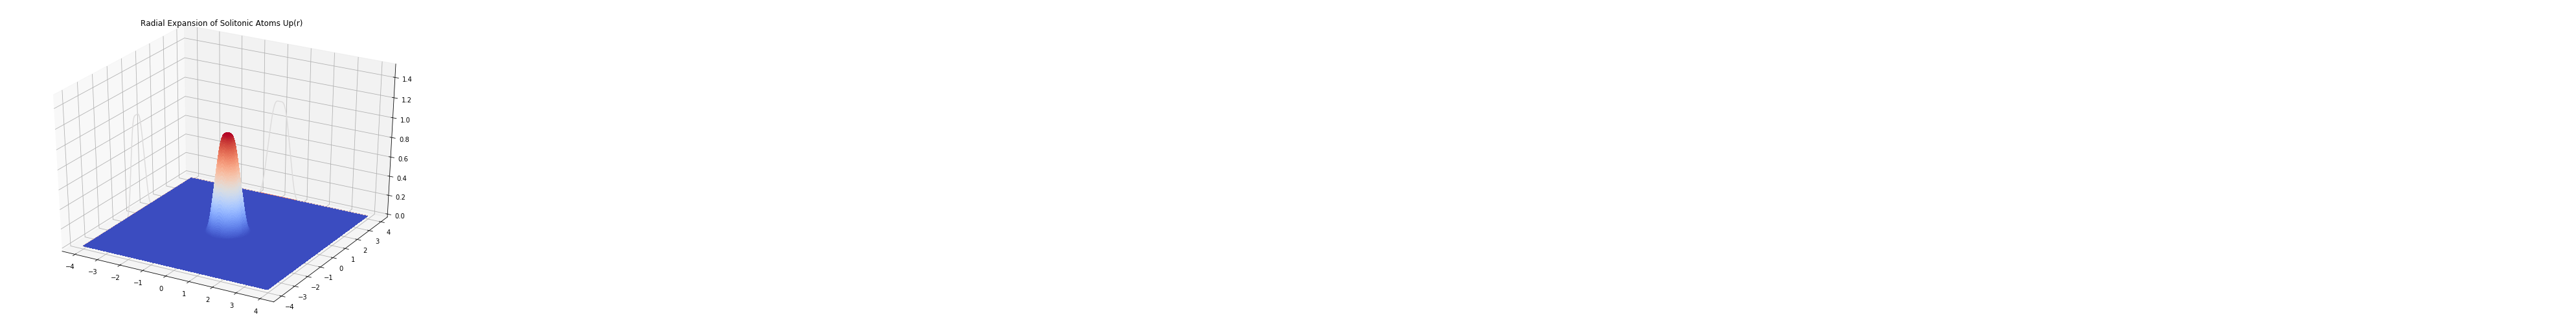

In [17]:
def RadialPulses(x: float, y: float) -> float:
    r = np.sqrt(x**2 + y**2) # Radial Coordinate
    return pulse(up1, r, a = 1., b = 0., c = 1.)

plot3d(RadialPulses, title = 'Radial Expansion of Solitonic Atoms Up(r)', xmin = -4, xmax = 4, ymin = -4, ymax = 4, 
       N = 400, showColorbar = False, ContourOffsets = [-4,4])

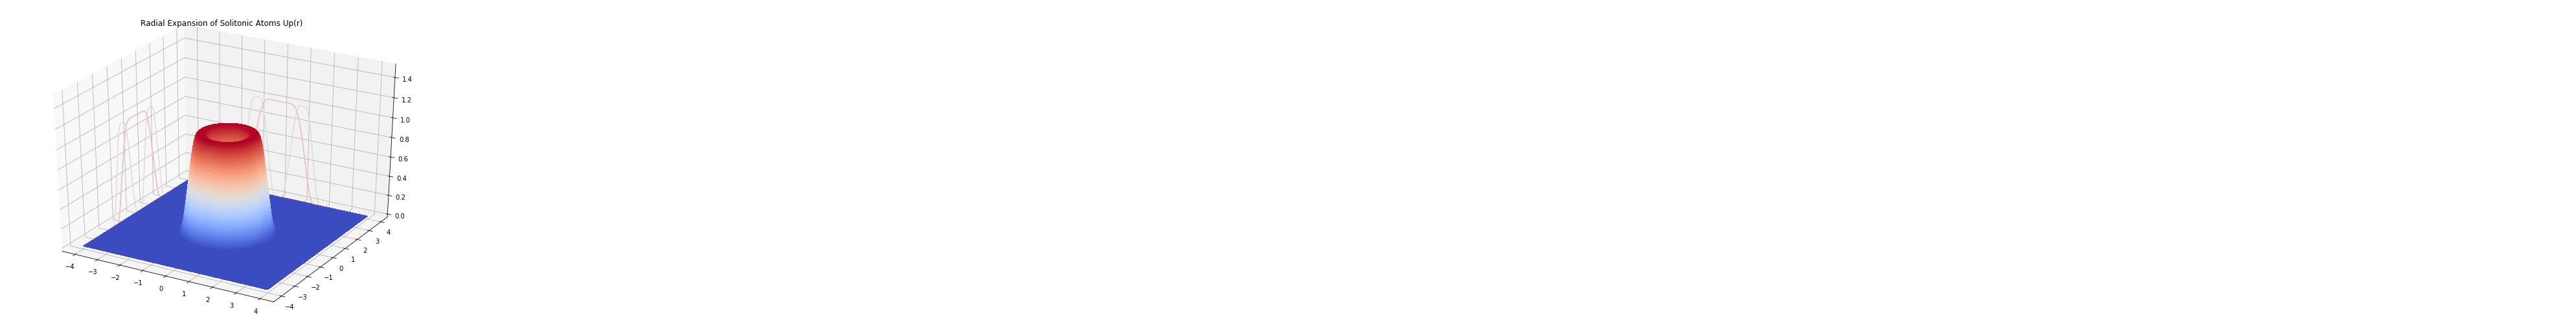

In [18]:
def RadialPulses(x: float, y: float) -> float:
    r = np.sqrt(x**2 + y**2) # Radial Coordinate
    return pulse(up1, r, a = -1., b = 1., c = 1.)

plot3d(RadialPulses, title = 'Radial Expansion of Solitonic Atoms Up(r)', xmin = -4, xmax = 4, ymin = -4, ymax = 4, 
       N = 400, showColorbar = False, ContourOffsets = [-4,4])

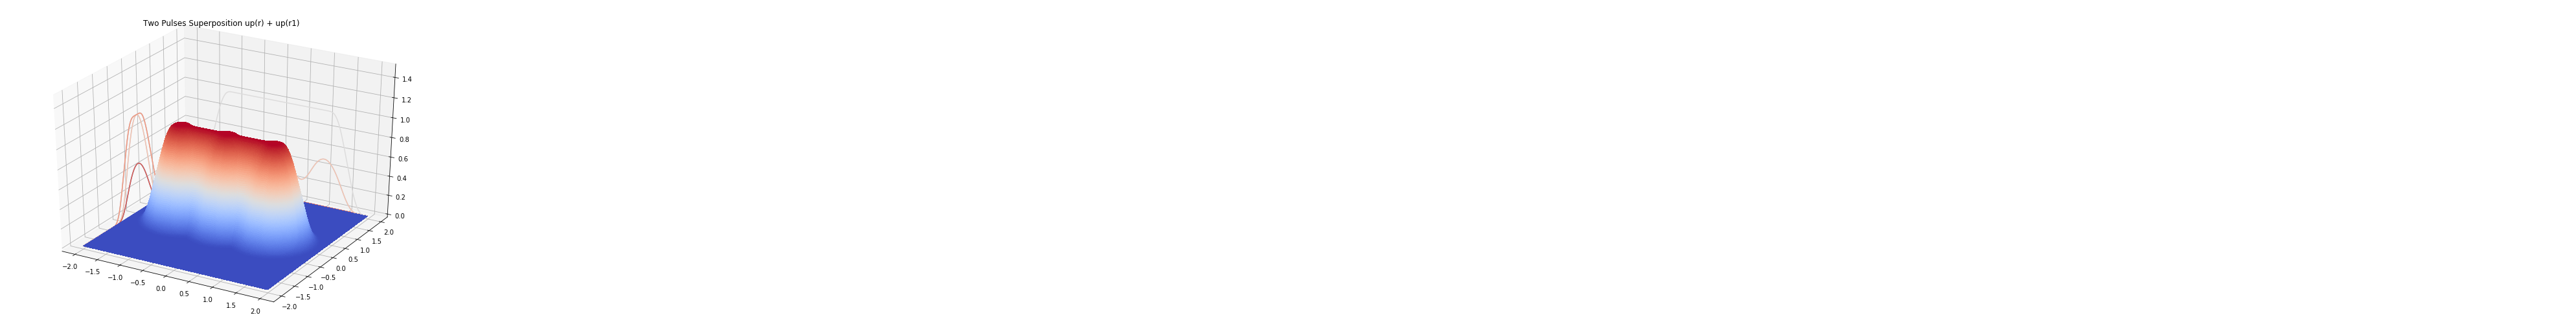

In [19]:
def ManyPulses(x: float, y: float) -> float:
    r  = np.sqrt((x-1)**2 + (y-0)**2) # Radial Coordinate
    r1 = np.sqrt((x+1)**2 + (y+0)**2) # Shifted coordinate
    sum = pulse(up1, np.sqrt((x-1.0)**2 + (y-0)**2), a = 1., b = 0., c = 1.) + \
          pulse(up1, np.sqrt((x-0.0)**2 + (y-0)**2), a = 1., b = 0., c = 1.) + \
          pulse(up1, np.sqrt((x+1.0)**2 + (y-0)**2), a = 1., b = 0., c = 1.)
    return sum

plot3d(ManyPulses, title = 'Two Pulses Superposition up(r) + up(r1)', xmin = -2, xmax = 2, ymin = -2, ymax = 2, 
       N = 400, showColorbar = False, ContourOffsets = [-2,2])

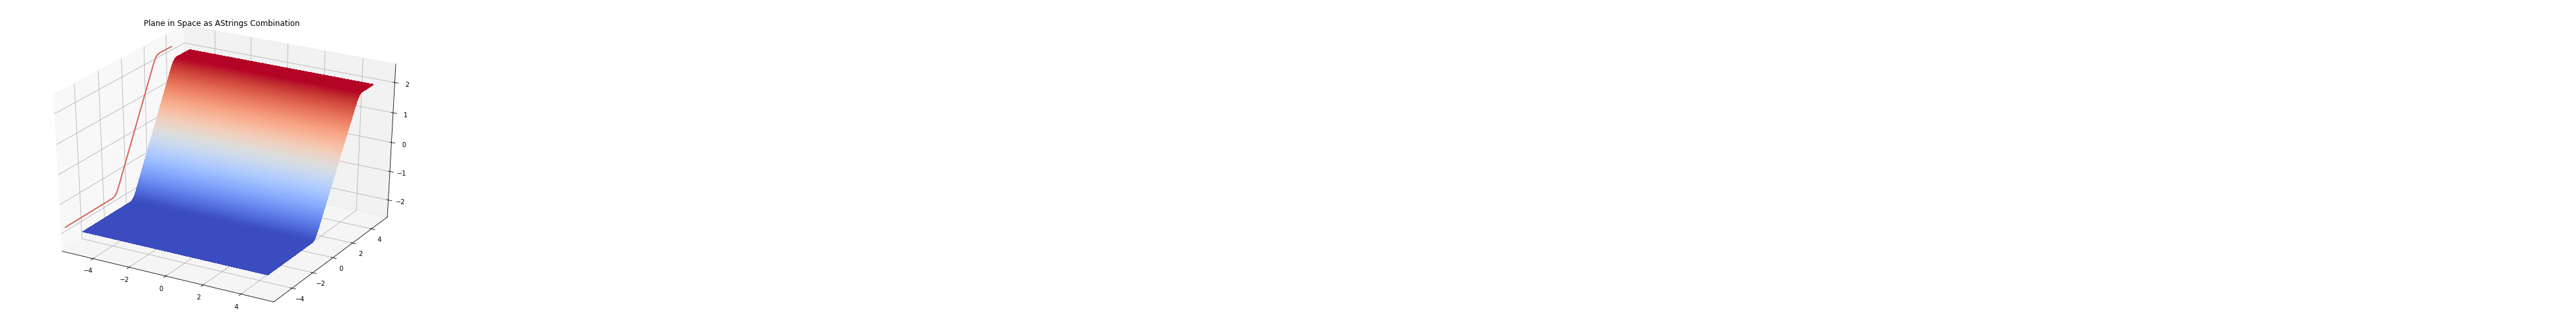

In [20]:
def AStringsPulses(x: float, y: float) -> float:
    rx  = AStringPulse(y, a = 1., b = 0.00, c = 1.) + AStringPulse(y, a = 1., b = 1.00, c = 1.) \
        + AStringPulse(y, a = 1., b = 2.00, c = 1.) + AStringPulse(y, a = 1., b = 3.00, c = 1.) \
        #+ AStringPulse(x, a = 1., b = 3.00, c = 1.)
    ry = 1 #pulse(up1, y, a = 1., b = -1., c = 1.) + pulse(up1, y, a = 1., b = 0., c = 1.) + pulse(up1, y, a = 1., b = 1.00, c = 1.)    
    return (rx * ry)
plot3d(AStringsPulses, title = 'Plane in Space as AStrings Combination', xmin = -5, xmax = 5, 
       ymin = -5, ymax = 5, Zlim = [-2.5, 2.5], N = 400, showColorbar = False, ContourOffsets = [-6, float("inf")])

# AStrings as Multi-dimensional Integrals

In [21]:
def multidim_cumsum(a):
    out = a[...,::-1].cumsum(-1)[...,::-1]
    for i in range(2,a.ndim+1):
        np.cumsum(out, axis=-i, out=out)
    return out

In [22]:
def plot3dIntegral(func, title = 'Atomic Function pulse', xmin = -2., xmax = 2., ymin = -2., ymax = 2., 
           N = 200, showColorbar = True, Zlim = [0, 1.5], showContour = True, ContourOffsets = [-2., 2.]):
    # Create 3D figure
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.arange(xmin,  xmax, (xmax - xmin)/N)
    Y = np.arange(ymin,  ymax, (ymax - ymin)/N)
    X, Y = np.meshgrid(X, Y)

    Z = X.copy() # Allocate memory

    for i in range(len(X)):
        for j in range(len(X)):
            x = X[i][j]
            y = Y[i][j]
            Z[i][j] = func(x, y)/len(X)/len(X)
            # print(i, j, x, y, Z[i][j])
    
    SumZ = multidim_cumsum(Z)
    MaxZ = np.amax(SumZ)
    MinZ = np.amin(SumZ)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, SumZ, cmap=cm.coolwarm, linewidth=0, antialiased=False, rstride=1, cstride=1)

    # Customize the z axis.
    #ax.set_zlim(Zlim[0], Zlim[1]*MaxZ)
    ax.set_zlim(MinZ, MaxZ * Zlim[1])
    
    # Countours
    if (showContour):
        #cset = ax.contour(X, Y, SumZ, zdir='z', cmap=cm.coolwarm, offset=0)
        cset = ax.contour(X, Y, SumZ, zdir='x', cmap=cm.coolwarm, offset = ContourOffsets[0])
        cset = ax.contour(X, Y, SumZ, zdir='y', cmap=cm.coolwarm, offset = ContourOffsets[1])
   
    # Add a color bar which maps values to colors.
    if (showColorbar):
        fig.colorbar(surf, shrink=0.5, aspect=5)

    #Show
    plt.title(title)
    plt.show()

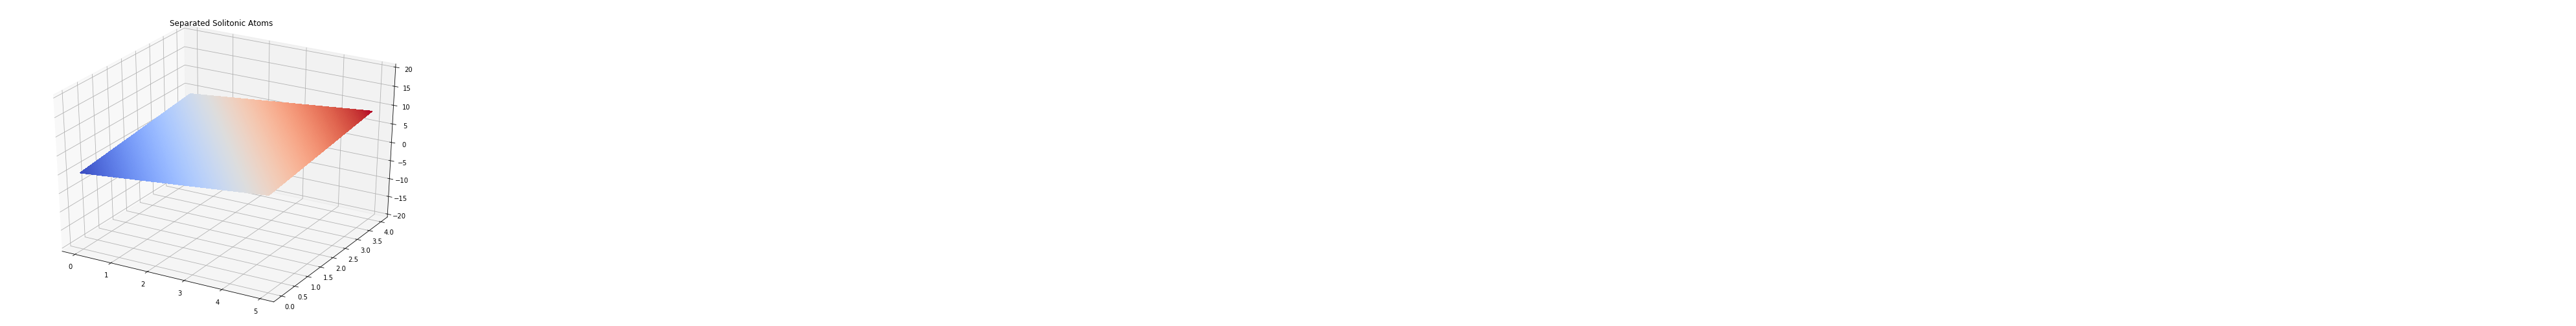

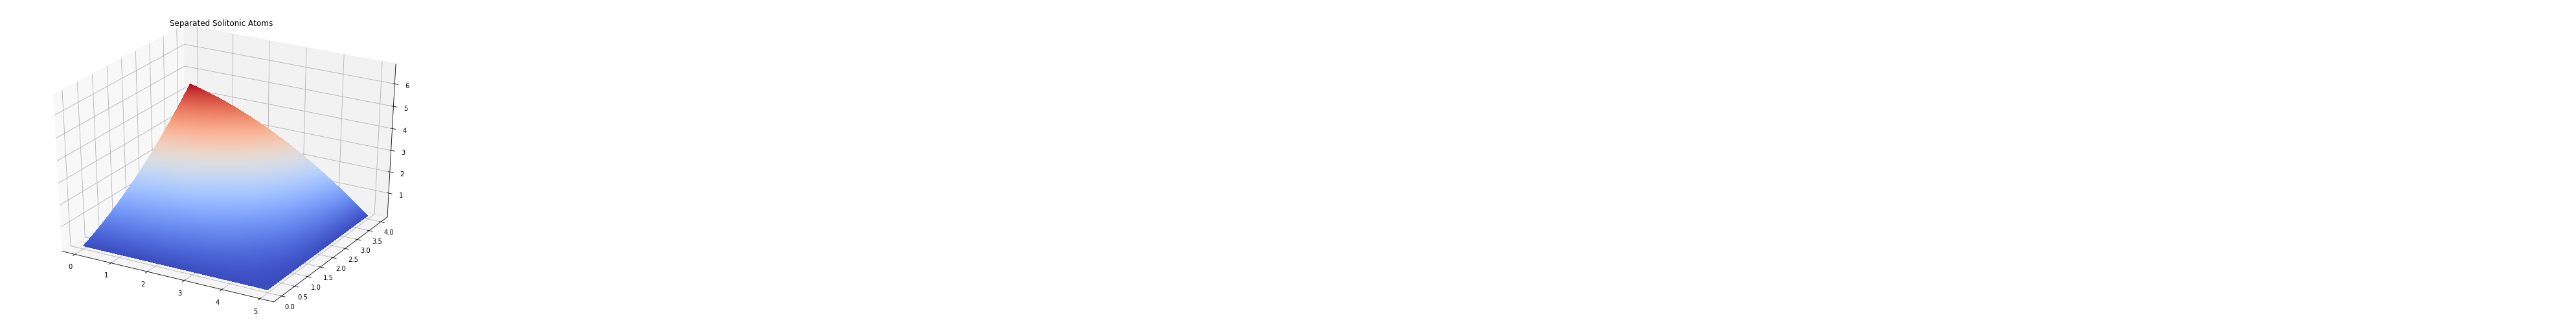

In [23]:
#Int Test
def IntTest(x: float, y: float) -> float:
    return x + y
plot3d(IntTest, title = 'Separated Solitonic Atoms', xmin = 0, xmax = 5, ymin = 0, ymax = 4, 
       N = 400, showColorbar = False, showContour = False, Zlim=[-20,20])
plot3dIntegral(IntTest, title = 'Separated Solitonic Atoms', xmin = 0, xmax = 5, ymin = 0, ymax = 4, 
       N = 400, showColorbar = False, showContour = False)

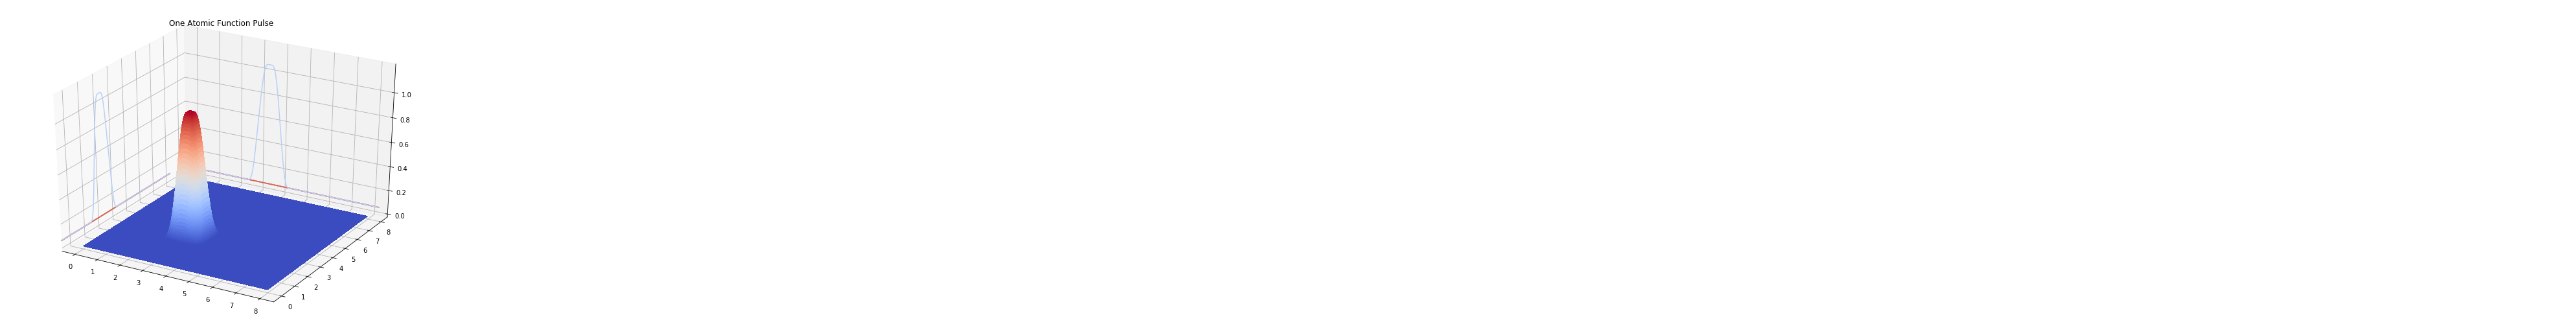

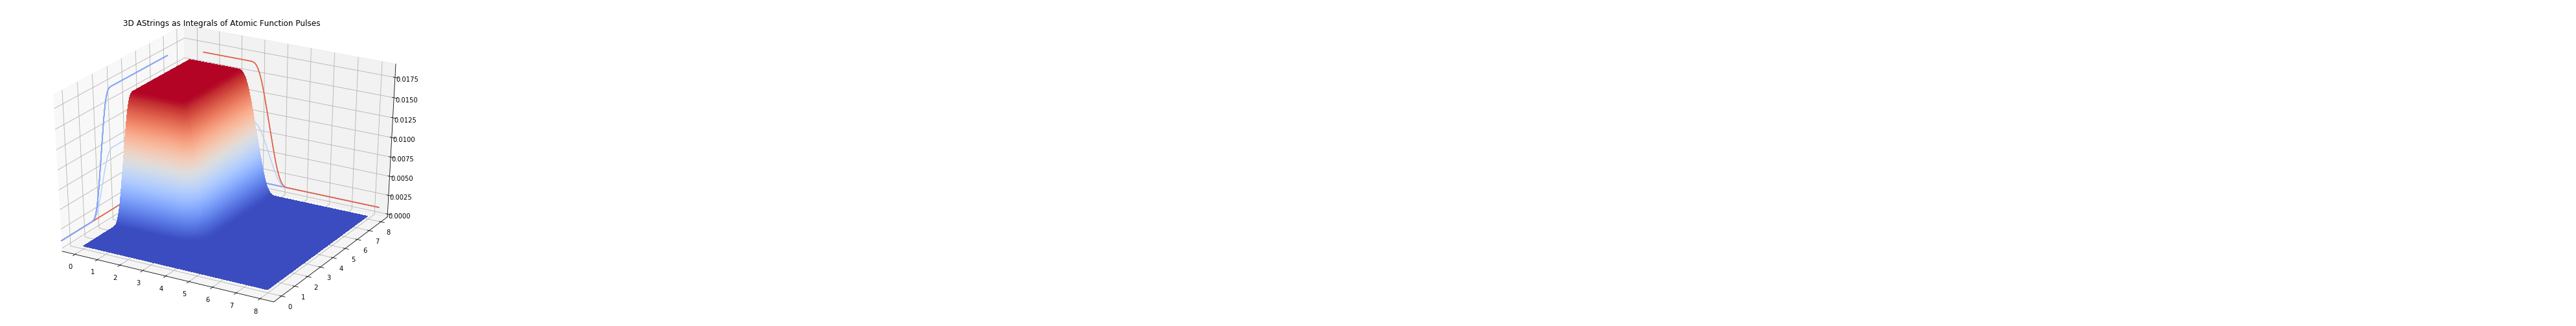

In [24]:
# One Pulse
def OnePulse(x: float, y: float) -> float:
    rx = pulse(up1, x, a = 1., b = 3., c = 1.)
    ry = pulse(up1, y, a = 1., b = 3., c = 1.)  
    return (rx * ry)

plot3d(OnePulse, title = 'One Atomic Function Pulse', xmin = 0, xmax = 8, ymin = 0, ymax = 8, 
       N = 400, showColorbar = False, Zlim = [0, 1.2], ContourOffsets = [-1,9])

plot3dIntegral(OnePulse, title = '3D AStrings as Integrals of Atomic Function Pulses' , xmin = 0, xmax = 8, ymin = 0, ymax = 8, 
       N = 400, showColorbar = False, Zlim = [0, 1.2], ContourOffsets = [-1,9])

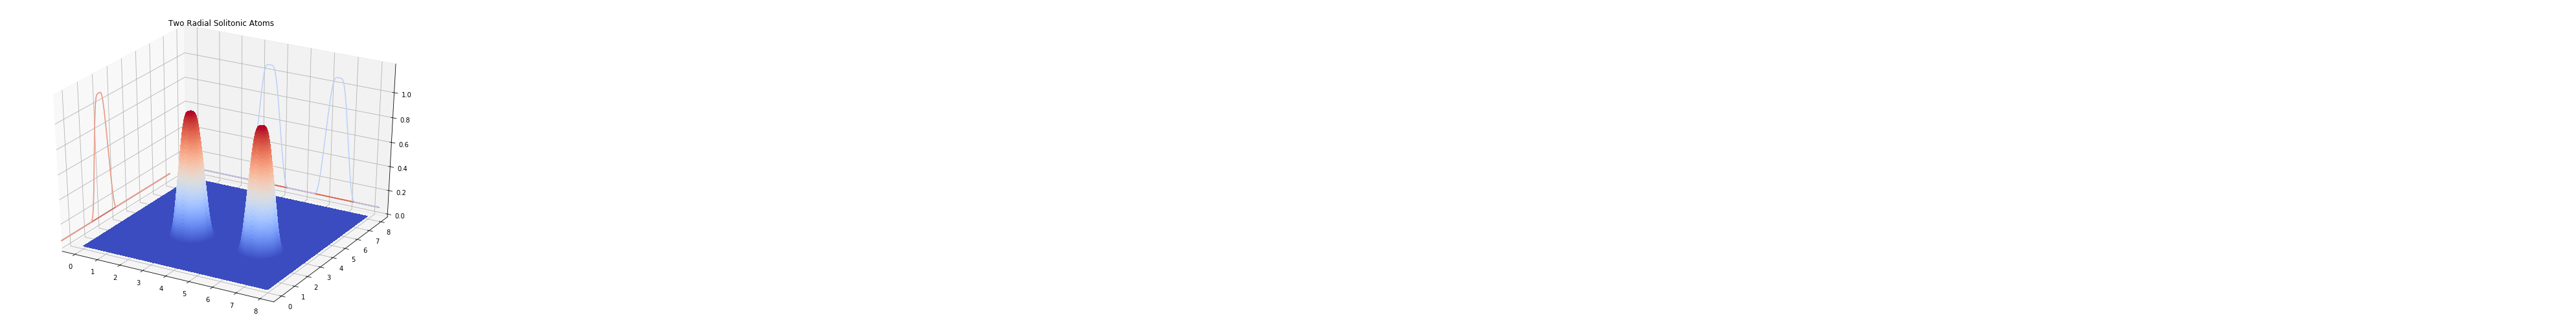

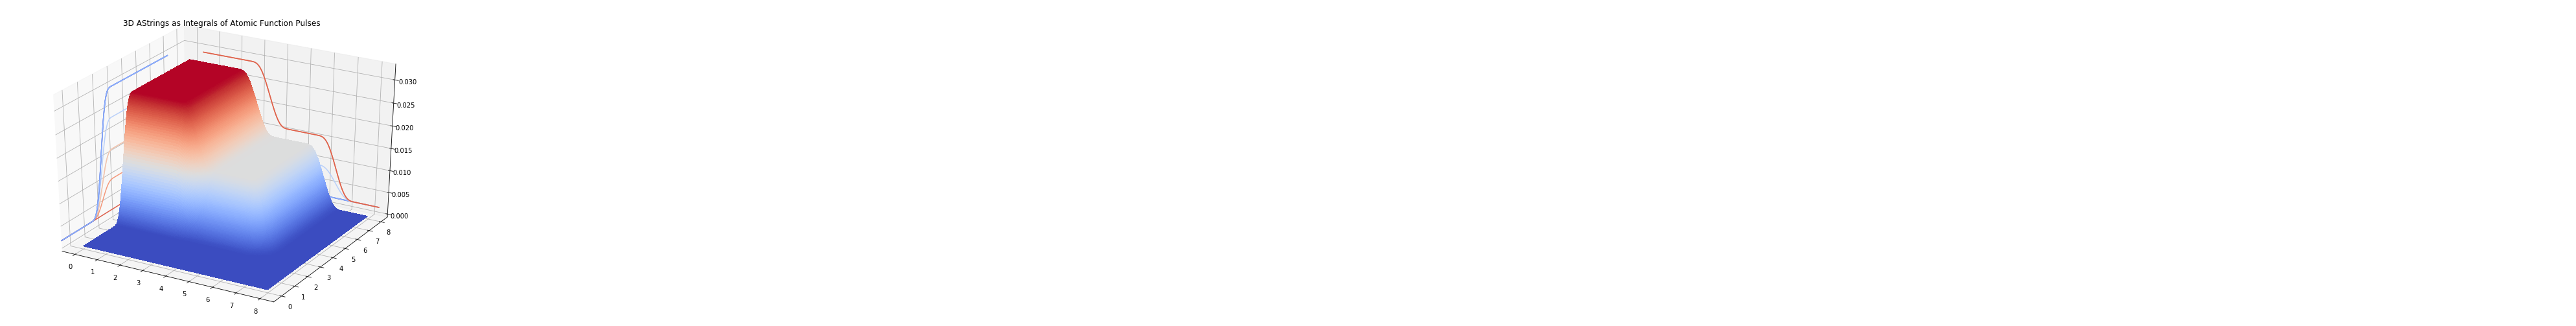

In [25]:
def TwoPulses(x: float, y: float) -> float:
    r = np.sqrt((x-3)**2 + (y-3)**2) # Radial Coordinate
    r1 = np.sqrt((x-6)**2 + (y-3)**2) # Shifted coordinate
    return pulse(up1, r, a = 1., b = 0., c = 1.) + pulse(up1, r1, a = 1., b = 0, c = 1.)

plot3d(TwoPulses, title = 'Two Radial Solitonic Atoms', xmin = 0, xmax = 8, ymin = 0, ymax = 8, 
       N = 400, showColorbar = False, Zlim = [0, 1.2], ContourOffsets = [-1,9])

plot3dIntegral(TwoPulses, title = '3D AStrings as Integrals of Atomic Function Pulses', xmin = 0, xmax = 8, ymin = 0, ymax = 8, 
       N = 400, showColorbar = False, Zlim = [0, 1.2], ContourOffsets = [-1,9])

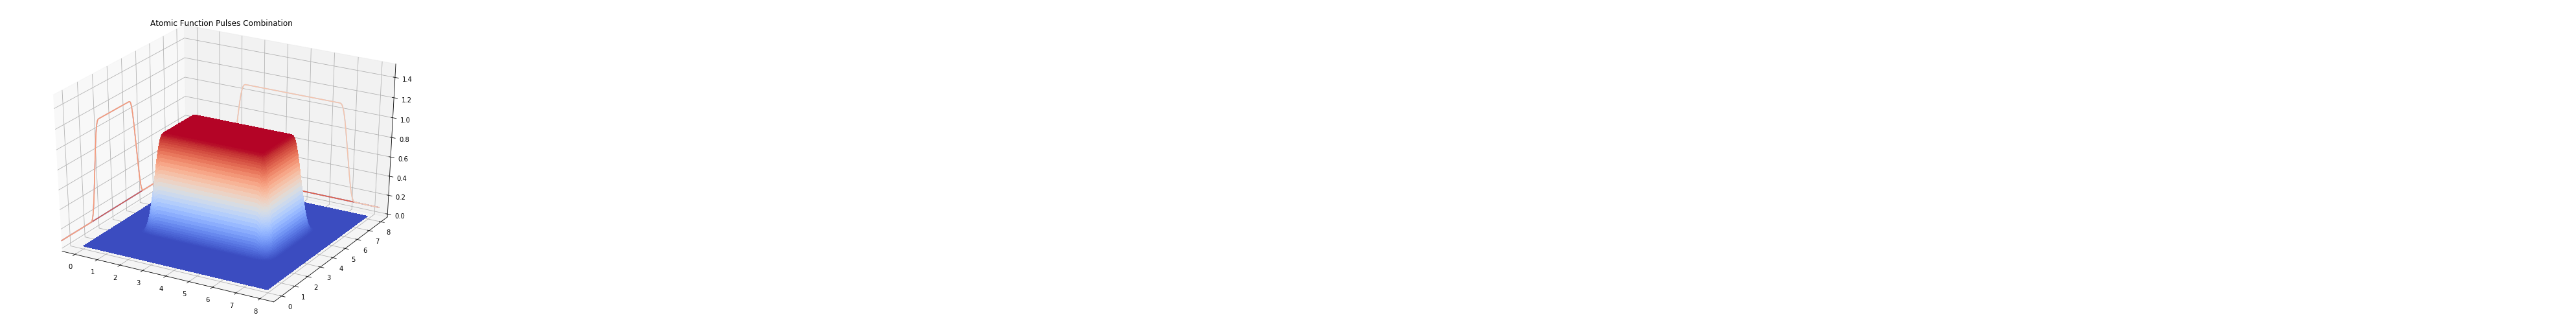

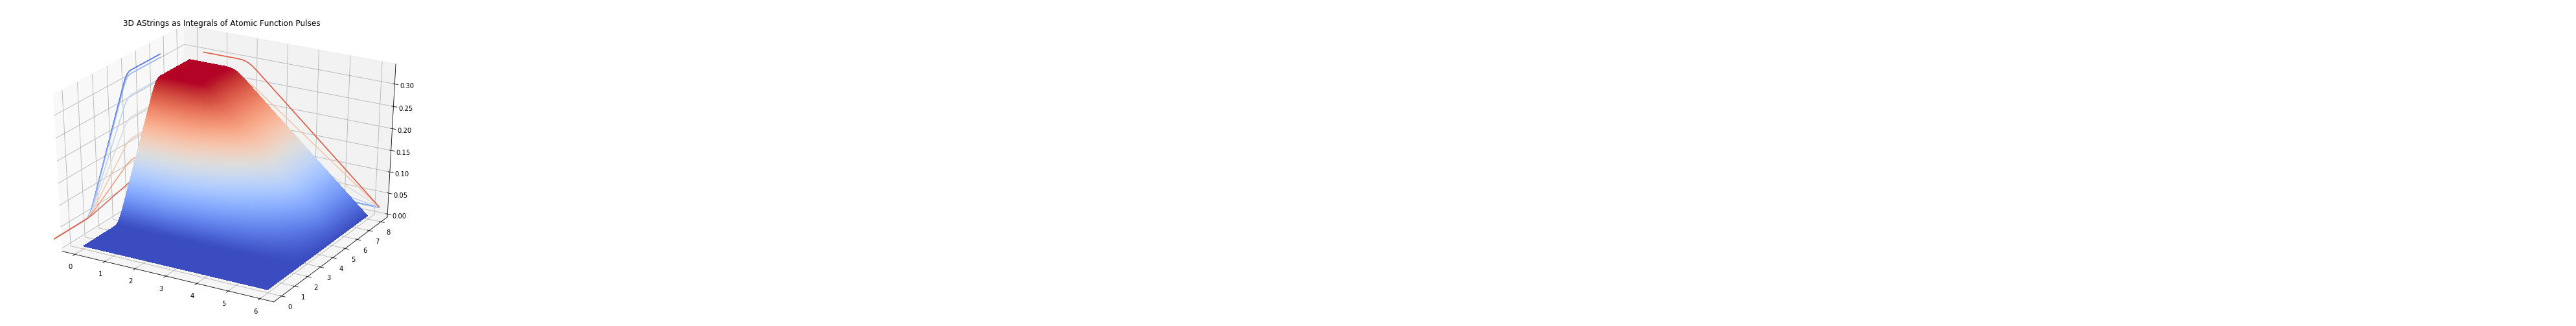

In [26]:
def ManyPulses(x: float, y: float) -> float:
    rx = pulse(up1, x, a = 1., b = 2., c = 1.) + pulse(up1, x, a = 1., b = 3., c = 1.) \
        + pulse(up1, x, a = 1., b = 4., c = 1.) + pulse(up1, x, a = 1., b = 5., c = 1.) \
        + pulse(up1, x, a = 1., b = 6., c = 1.)
    ry = pulse(up1, y, a = 1., b = 3., c = 1.) + pulse(up1, y, a = 1., b = 4., c = 1.) + pulse(up1, y, a = 1., b = 5., c = 1.)    
    return (rx * ry)

plot3d(ManyPulses, title = 'Atomic Function Pulses Combination', xmin = 0, xmax = 8, ymin = 0, ymax = 8, 
       N = 400, showColorbar = False, ContourOffsets = [-1,9])

plot3dIntegral(ManyPulses, title = '3D AStrings as Integrals of Atomic Function Pulses', xmin = 0, xmax = 6, ymin = 0, ymax = 8, 
       N = 400, showColorbar = False, Zlim = [0, 1.2], ContourOffsets = [-1,9])

## AStrings Compounding

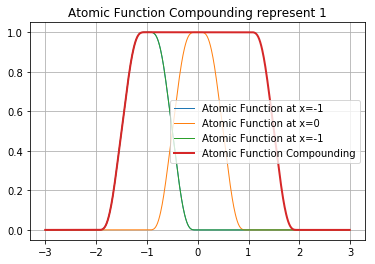

In [27]:
x = np.arange(-3.0, 3.0, 0.01)
width = 1.
height = 1.
pl.plot(x, up(up1, x, width, -1*width, height), linewidth=1, label='Atomic Function at x=-1')
pl.plot(x, up(up1, x, width, +0*width, height), linewidth=1, label='Atomic Function at x=0')
pl.plot(x, up(up1, x, width, -1*width, height), linewidth=1, label='Atomic Function at x=-1')
pl.plot(x, Sum(up(up1, x, width, -1*width, height), Sum(up(up1, x, width, 0*width, height), up(up1, x, width, 1*width, height))), 
        linewidth=2, label='Atomic Function Compounding')
pl.title('Atomic Function Compounding represent 1')
pl.legend(loc='best', numpoints=1)
pl.grid(True)
pl.show()

## Uneven Distribution

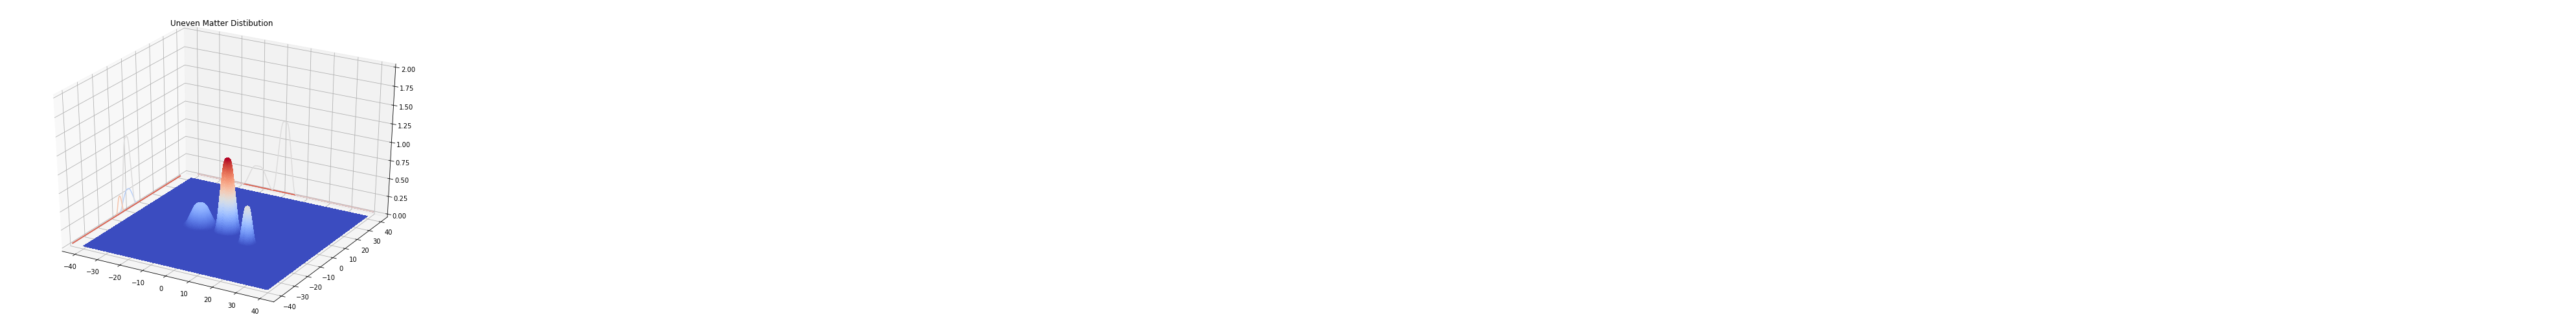

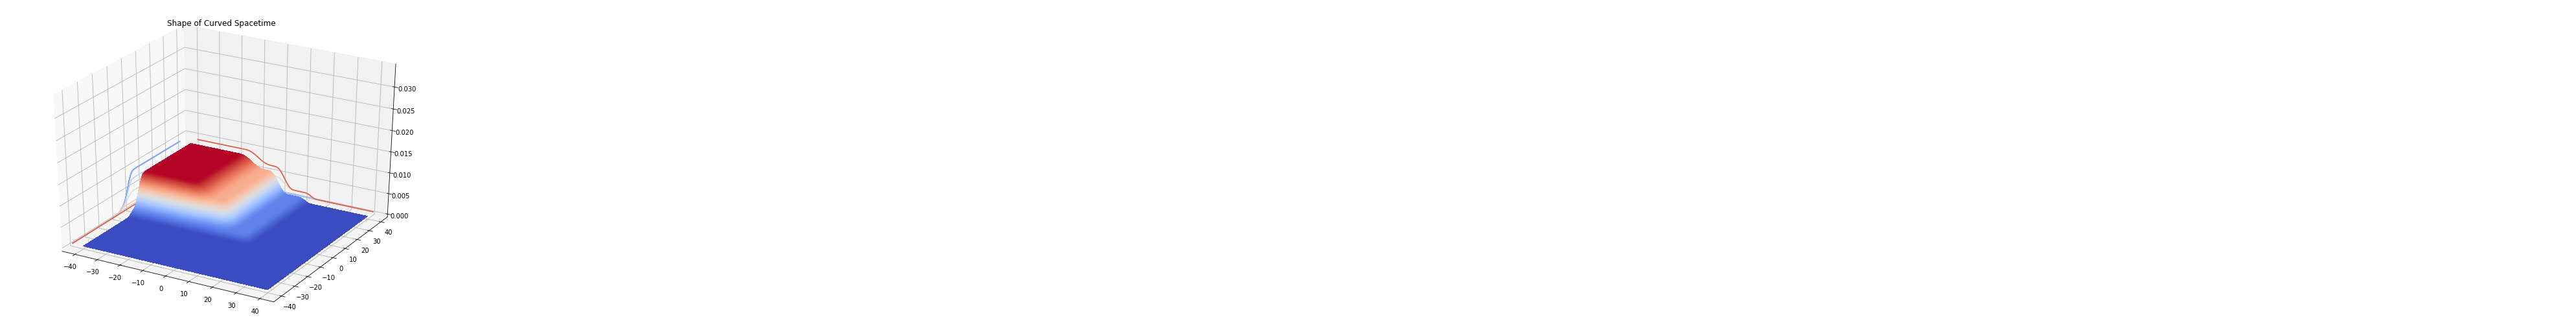

In [28]:
def UnevenDist(x: float, y: float) -> float:
    sum = pulse(up1, np.sqrt((x-12.0)**2 + (y+6)**2), a = 4., b = 0., c = 0.5) + \
          pulse(up1, np.sqrt((x-0.00)**2 + (y-0)**2), a = 6., b = 0., c = 1.) + \
          pulse(up1, np.sqrt((x+12.0)**2 + (y-0)**2), a = 8., b = 0., c = 0.3)
    return sum

plot3d(UnevenDist, title = 'Uneven Matter Distibution', xmin = -40, xmax = 40, ymin = -40, ymax = 40, 
       N = 600, showColorbar = False, ContourOffsets = [-45,45],  Zlim = [0, 2])

plot3dIntegral(UnevenDist, title = 'Shape of Curved Spacetime', xmin = -40, xmax = 40, ymin = -40, ymax = 40, 
       N = 600, showColorbar = False, Zlim = [0, 4], ContourOffsets = [-45,45])

<div align="right">&copy; Copyright By Prof. Sergei Eremenko https://www.researchgate.net/profile/Sergei_Eremenko</div>